# Notebook for Exploratory Data Analysis And Predictive Modelling (Bike Sharing Data) 

## Preliminary Imports 

In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import quantile_transform, Imputer
from scipy.signal import correlate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.formula.api import ols
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, HuberRegressor, ElasticNetCV
from sklearn import linear_model,preprocessing, model_selection  
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
import matplotlib.lines as mlines
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## loading of the data from CSV file 

In [13]:
hourly_data = pd.read_csv("hour.csv")
print(hourly_data.shape)

(17379, 17)


In [14]:
hourly_data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [15]:
hourly_data.tail(3)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [16]:
'''''
Here in the code below we have to check the data types we will be working and if needed 
we change the types of data
'''''

"''\nHere in the code below we have to check the data types we will be working and if needed \nwe change the types of data\n"

In [17]:
hourly_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Feature selection

In [18]:

hourly_data.rename(columns={"hr": "hour", "dteday":"date", "yr":"year",
                            "hum":"humidity", "cnt":"totalcount", "mnth":"month",
                            "weathersit":"weather"}, inplace=True)

hourly_data  = hourly_data.drop(["instant", "date", "year"],axis=1)


In [19]:
hourly_data.head(3)

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [9]:
hourly_data.describe()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalcount
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
'''
In this code it is important to check for any missing values in the data we will be working with before we 
move a step further in our analysis. This will let us avoid issues of NAN.

'''

hourly_data.isnull().any()

season        False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
totalcount    False
dtype: bool

## Visualisations of data points

part 01:

Here we take a look at the type of data presented. We expect this to be in one of the categories such as continuous, dichotomous, nominal and ordinal. The easiest to determinal will be the continuous features which portray a continuous distribution. The dichotomous have a distribution containing only two bars. The last two types of features require an intuition when analysing the features at hand. Nominal data is type of data that is used to label variables without providing any quantitative value while ordinal data are the type of data in which the data values follow a natural order 

Then we can see that:

Continuous features: causal, hour, humidity, month, registered, temp, windspeed

dichotomous features: holiday, workingday

Nominal features: weather, season, weekday 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc830b28518>,
      dtype=object)

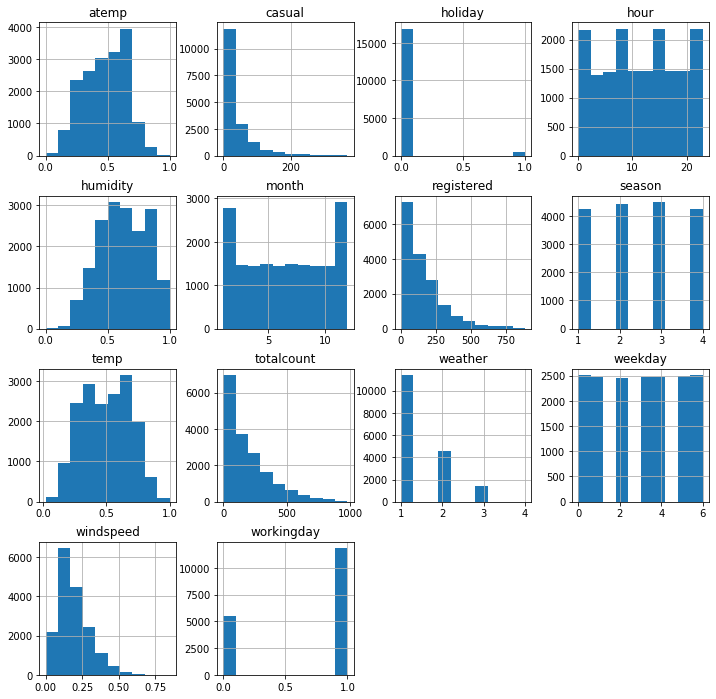

In [595]:
'''''
This code plots various distributions of our feature data points. The importance of this visualisation 
part is that it will enable us to know the data types of the features. If data points are categorical we 
make proper conversions before we proceed. 

'''''


hourly_data[hourly_data.dtypes[(hourly_data.dtypes=="float64")|(hourly_data.dtypes=="int64")]
                        .index.values].hist(figsize=[12,12])

In [20]:
hourly_data['season'] = hourly_data.season.astype('category')
hourly_data['month'] = hourly_data.month.astype('category')
hourly_data['hour'] = hourly_data.hour.astype('category')
hourly_data['holiday'] =hourly_data.holiday.astype('category')
hourly_data['weekday'] = hourly_data.weekday.astype('category')
hourly_data['workingday'] = hourly_data.workingday.astype('category')
hourly_data['weather'] = hourly_data.weather.astype('category')

In [21]:
hourly_data.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
totalcount       int64
dtype: object

## Check for missing data points

part 02:

Here we look at the distribution of data points. we would expect our data to have some form of a gaussian distribution to easily many different statistical phenomenon. However, from the first plot it is seen that the does not have a gaussian distribution. I have therefore, tranformed the to have a distribution close to the gaussain.

## checking for distribution of our data

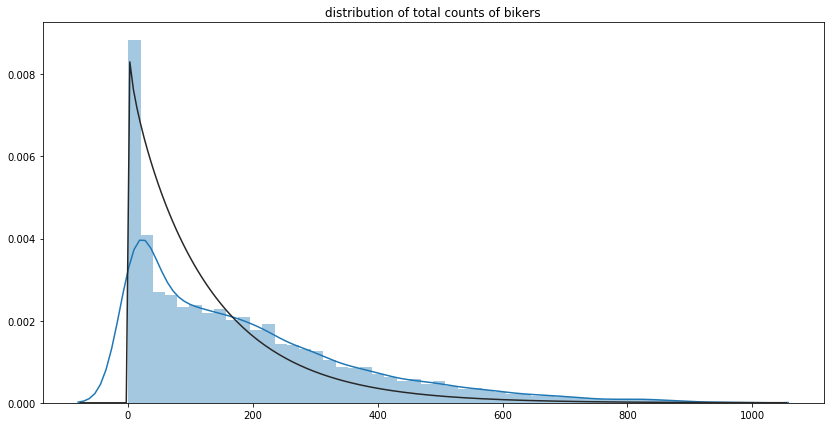

In [22]:
x = np.array(hourly_data["totalcount"])

fig, (ax1) = plt.subplots(ncols=1, figsize=(14,7))
ax1.set(title="distribution of total counts of bikers")
sn.distplot(x, kde=True, fit=stats.gamma, ax=ax1);

In [16]:
'''''
 This code transforms count attribute of the data to have a dsitibution that is close to that of gaussian.
'''''


count = hourly_data
cols = list(count.columns.values)
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
count = quantile_transformer.fit_transform(count)
count = pd.DataFrame(count)
count.columns = cols



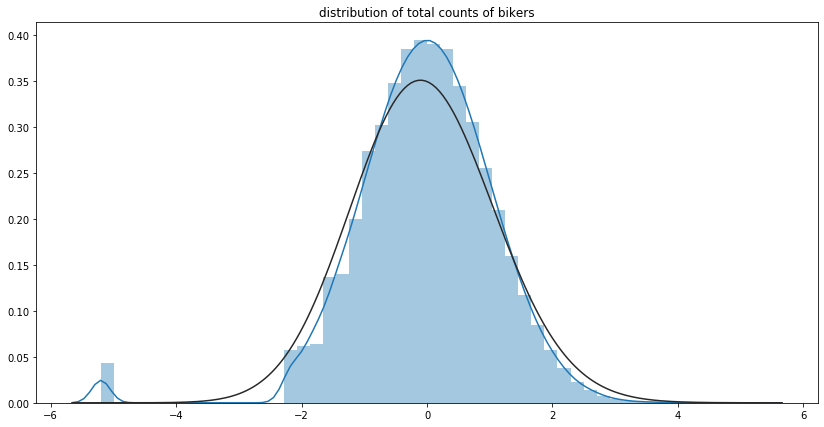

In [17]:
x = np.array(count["totalcount"])

fig, (ax1) = plt.subplots(ncols=1, figsize=(14,7))
ax1.set(title="distribution of total counts of bikers")
sn.distplot(x, kde=True, fit=stats.gamma, ax=ax1);

In [580]:
'''''
  Before moving forward lets take a look at our data set mean absolute deviations.
  The mean absolute deviation of a dataset is the average distance between each data 
  point and the mean. It gives us an idea about the variability in a dataset.
'''''

hourly_data.mad()

temp            0.165175
atemp           0.145324
humidity        0.163311
windspeed       0.096312
casual         34.139960
registered    114.396155
totalcount    142.399849
dtype: float64

The analysis above shows that the for different attributes in the dataset have different average deviations from the mean of that attribute in general. For instance, each data point in the attribute temp deviates on average from the mean by 0.165175, humidity deviates by 0.163311 e.t.c. This shows us that the data for attribute windspeed are more closely attached in space than that of registered which has high variability in space.

## Visualisations for use during weekdays and weekends 

Part 01: Visualisations of total number of users for each day

In this part we can see from the plots below that for all the days of the week people use more of the system
weekends between 8 and 18 hours. However, outside the stated time period, the usage of the system varies between weekends and working days.

[Text(0.5, 1.0, 'Use during weekdays and weekends')]

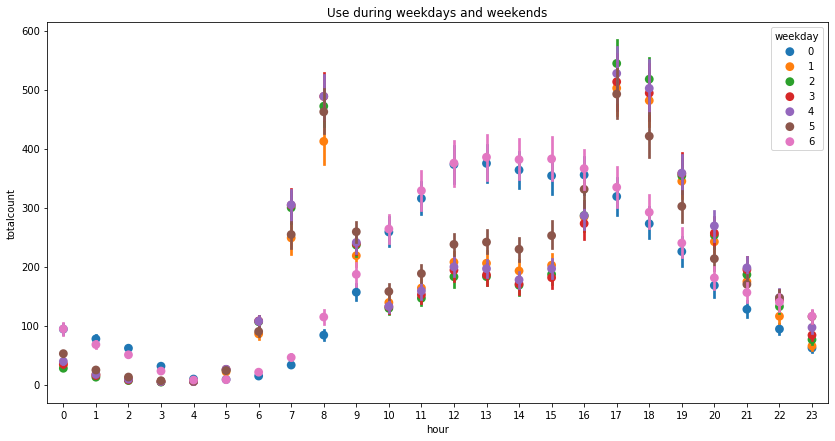

In [45]:
fig, ax = plt.subplots(figsize=(14,7))
sn.pointplot(data=hourly_data[['hour',
                       'totalcount',
                       'weekday']],
            x='hour', y='totalcount',
            hue='weekday', ax=ax, join = False)
ax.set(title="Use during weekdays and weekends")

## Visualisations for use during workingdays and holidays

Part 02: Visualisations working days and holidays 

In this part of analysis we can see from the visual plots below that in the time period ranging from 5 to 9 hours and 16 to 23 hours more people use the system during holidays. However, contrary to the time stated, more peolpe use the sytem during working days.

[Text(0.5, 1.0, 'Use during workingdays and holidays')]

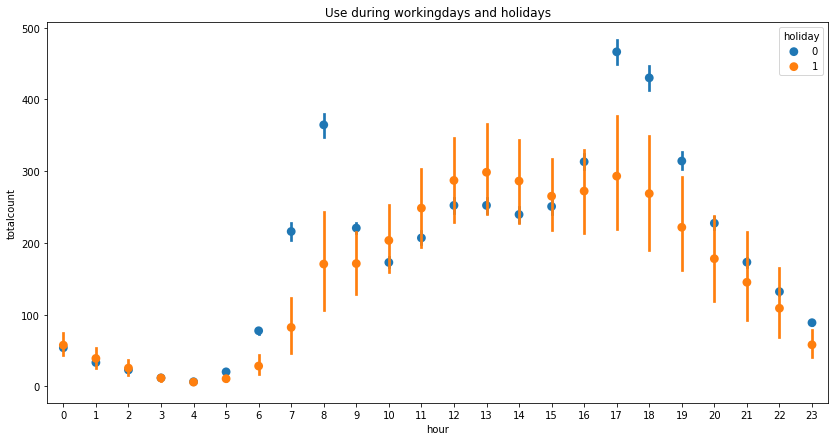

In [148]:
fig, ax = plt.subplots(figsize=(14,7))
sn.pointplot(data=hourly_data[['hour',
                       'totalcount',
                       'holiday']],
            x='hour', y='totalcount',
            hue='holiday', ax=ax, join = False)
ax.set(title="Use during workingdays and holidays")

## Visualisations of casual users pick times

part 03: Visuals of casual users of the system
    
It is indeed apparent from the plots below that casuals users use more of the sytem during weekends and holidays in general. To be specific the casual users make more use of the system around 9 to 19 hours.

[Text(0.5, 1.0, 'Use of the system by Casual users')]

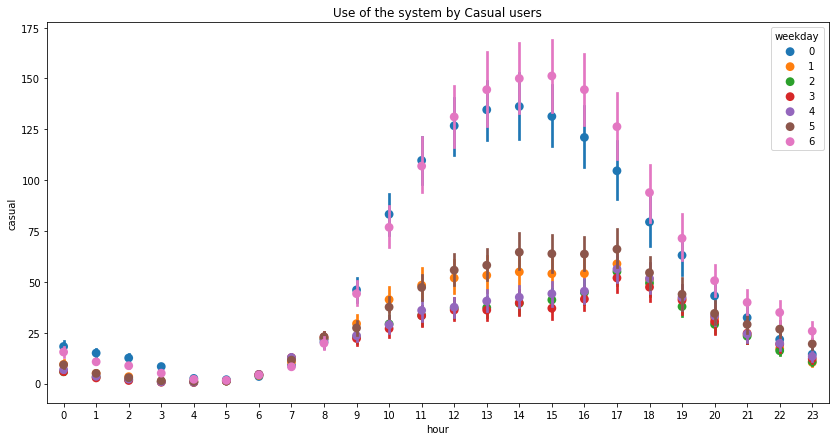

In [149]:
fig, ax = plt.subplots(figsize=(14,7))
sn.pointplot(data=hourly_data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax, join = False)

ax.set(title="Use of the system by Casual users")

## Visualisations of registers users pick times

part 04: Visualisations of registers users pick times

From the plots below, contrary to casual users, registered use have pick times on working days between 6 hours to 8 hours and between 17 to 19 hours on working days. The pick times on weekends and holidays is between 10 to 15 hours. In general considering working days and holidays, registered users use more of the system on working days.

[Text(0.5, 1.0, 'Use of the system by registered users')]

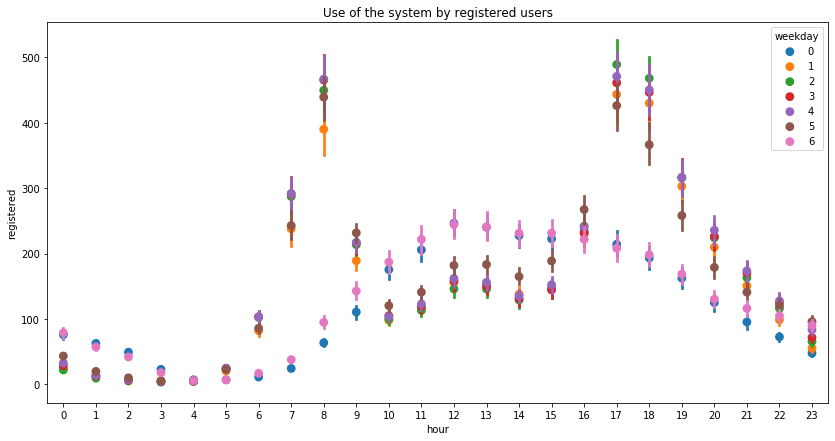

In [374]:
fig, ax = plt.subplots(figsize=(14,7))
sn.pointplot(data=hourly_data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax, join = False)

ax.set(title="Use of the system by registered users")

##  Use of the system according to the four seasons 

part 05: Use of the system according to the four seasons (1:winter, 2:spring, 3:summer, 4:fall)

Analysing the plots below, we system that in general more people use the system Summer and Fall and less people use the system in Winter. For people who use the system in Winter, their pick times are around 7 to 19 hours. 

[Text(0.5, 1.0, 'Use of the system: season')]

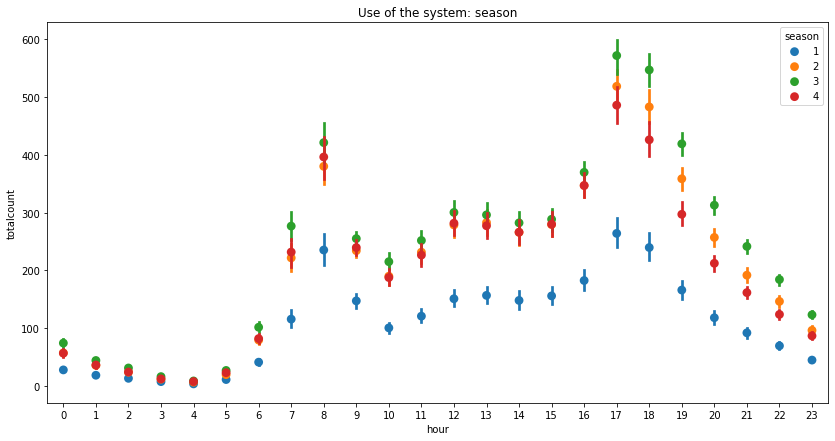

In [151]:
fig, ax = plt.subplots(figsize=(14,7))
sn.pointplot(data=hourly_data[['hour',
                       'totalcount',
                       'season']],
            x='hour', y='totalcount',
            hue='season', ax=ax, join = False)
ax.set(title="Use of the system: season")

## Use of the system according to the 12 months of the year 

Part 06:Use of the system according to the 12 months of the year

Here lets take a look at system usage when we consider months with pick system use in general. From the distribution below, we see that people use the system more for monthe between May to October. Of course as already analysed for the four seasons of the year it is evident that we expected less people to use the system for Winter months.

[Text(0.5, 1.0, 'Monthly distribution of System Use')]

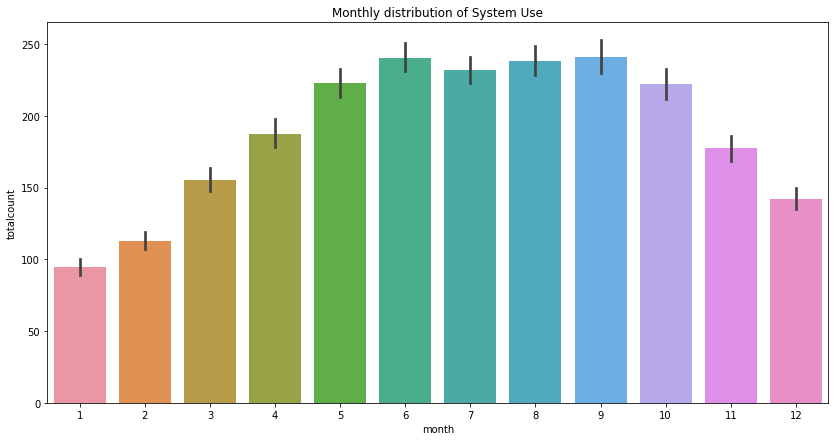

In [152]:

fig, ax = plt.subplots(figsize=(14,7))
sn.barplot(data=hourly_data[['month',
                      'totalcount']],
            x='month', y='totalcount')
ax.set(title="Monthly distribution of System Use")

## Use of the system According temperature

part 07: Analysis of system use according to temperature
    
Looking at the plot of distribution below, we see actualy that more people use the system with a rise in temperature. Of course as expected more people would use the system more in summer. However, we see that in rare case even if the temperature in high there is a drop in overall usage. This sugests that we make further analysis by considering the case of humidity. We have to think that in the cases where there was a rise in tempereture there might have been high humidity as well. 




[Text(0.5, 1.0, 'Temperature distribution of System Use')]

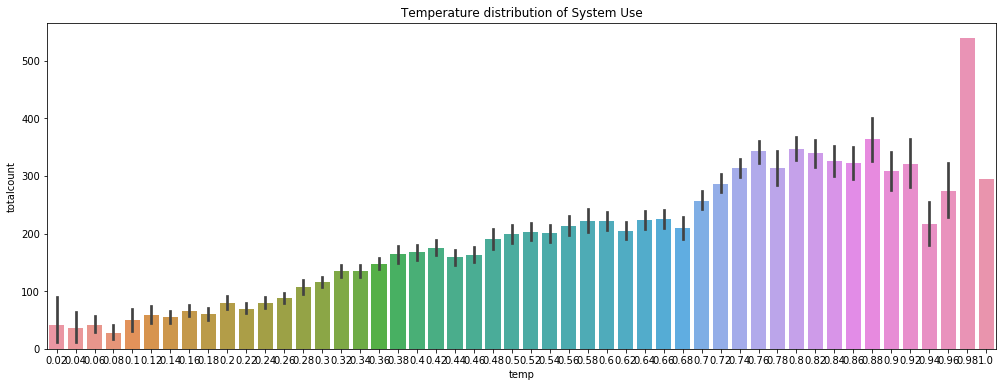

In [153]:

fig, ax = plt.subplots(figsize=(17,6))
sn.barplot(data=hourly_data[['temp',
                      'totalcount']],
            x='temp', y='totalcount')
ax.set(title="Temperature distribution of System Use")

## Use of the system According Humidity

Part 08: Analysis of the system use with a rise in Humidity

We see from the plots for humidity that in general a rise in humidity entails less use of the system. This actualy explains the fact that in some cases where there in a rise in temperature people consider to use the system less that we anticipate. Less use of the system in high temperature days might entails high humidity on those days. In addition less use of the system in low humidy days entails low temperatures of those days.

[Text(0.5, 1.0, 'Humidity distribution of System Use')]

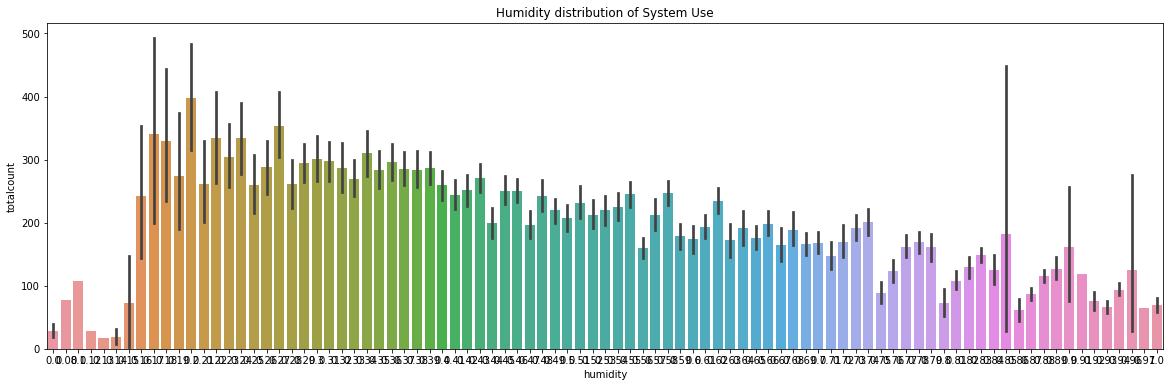

In [154]:

fig, ax = plt.subplots(figsize=(20,6))
sn.barplot(data=hourly_data[['humidity',
                      'totalcount']],
            x='humidity', y='totalcount')
ax.set(title="Humidity distribution of System Use")

## Use of the system According Wind speed

Part 09: Analysis of system use with wind speed

Lets now consider how users use the system when there is low to high wind speed. By intuition, we expect less people to use the syste when there is high wind speed. Let us look at the plots below. 

Looking at the plot below, as sugested less people use the system when there is high wind speed. However, there is a particular instance that people use the system even though the wind speed is high. According to the analysis that we have made thus far, we can conclude that such a day might have had favourable temperatures, humidity,or it might have been a holiday.

[Text(0.5, 1.0, 'Wind Speed distribution of System Use')]

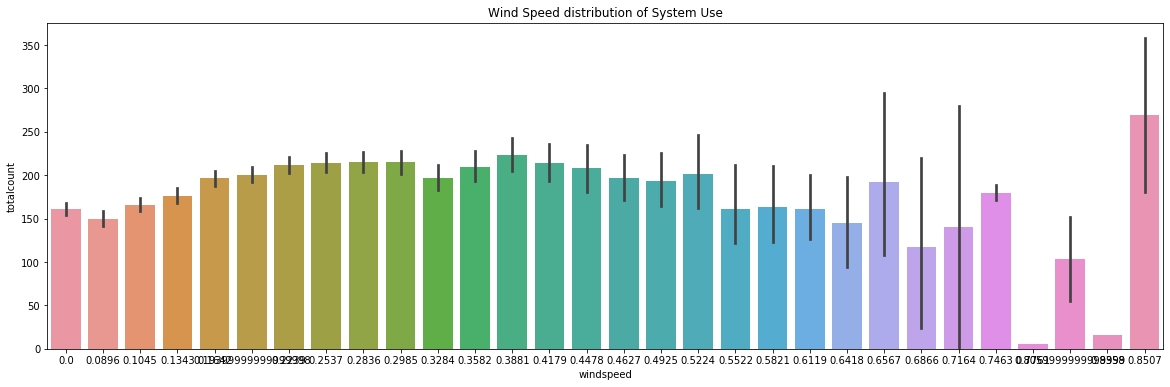

In [155]:
fig, ax = plt.subplots(figsize=(20,6))
sn.barplot(data=hourly_data[['windspeed',
                      'totalcount']],
            x='windspeed', y='totalcount')
ax.set(title="Wind Speed distribution of System Use")

## Checking correlations of data points (features) to see influence on totalcount and among each other

part 10: Analysis correlations on each attribute
    
Here we are interested in selected good feetures that have high influence on the depend variable but not on each other. We want to avoid multicolinearity in our features. Features that have high correlations on each will mean that they will have same effect on the depend variable so we just have to choose one of them. 

Looking at the plot for correlations below, we see that casual and registered have high correlations. Of course these two values are just the break down of what we want to predict therefore, it would not make any sense to include them as part of our features during modelling. We therefore, remove them.

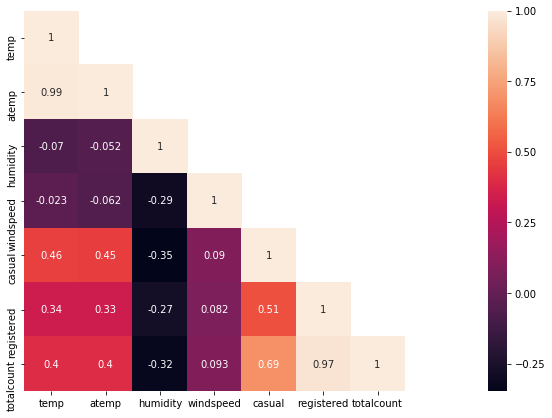

In [434]:

corrs = hourly_data[hourly_data.columns ].corr()
mask = np.array(corrs)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(30,7))
sn.heatmap(corrs, mask=mask, vmax=1, square=True, annot=True)

In [598]:
'''''
:::Here we remove the values that have high correlations
'''''

hourly_data = hourly_data.drop(['casual', 'registered'], axis=1)


## Checking for outliers from data points to avoid affecting the model prediction 

[Text(0.5, 1.0, 'Boxplot for seasons')]

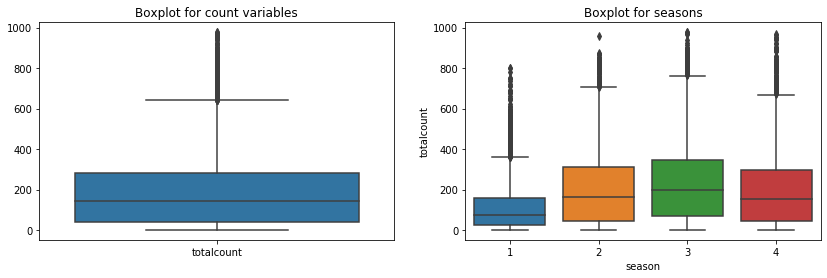

In [522]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
sn.boxplot(data=hourly_data[['totalcount']], ax=ax1)
ax1.set(title="Boxplot for count variables")
sn.boxplot(x=hourly_data['season'],y=hourly_data['totalcount'], ax=ax2)
ax2.set(title="Boxplot for seasons")


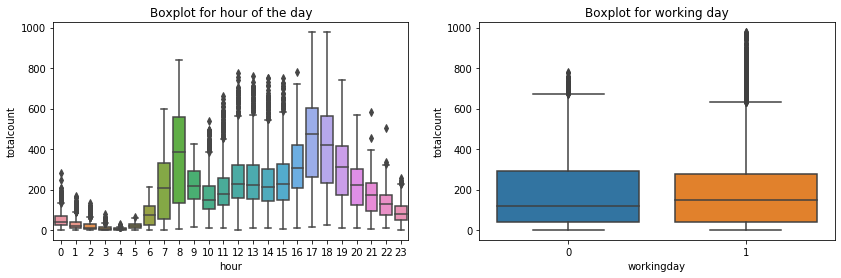

In [523]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['totalcount'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=hourly_data['workingday'],y=hourly_data['totalcount'], ax=ax2)

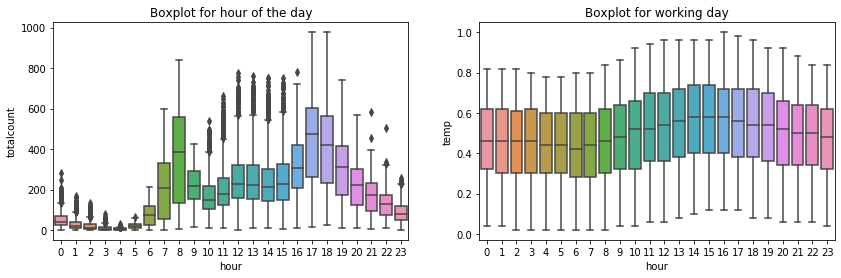

In [524]:

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['totalcount'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['temp'], ax=ax2)

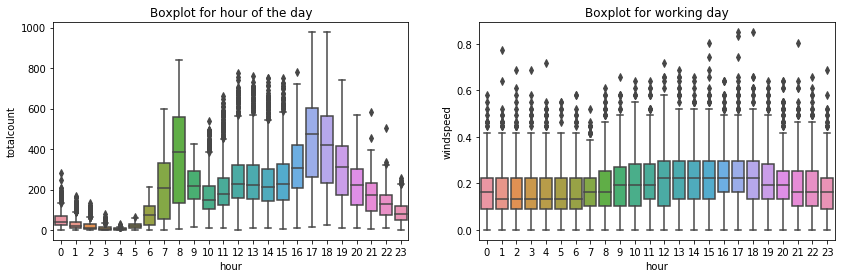

In [161]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['totalcount'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['windspeed'], ax=ax2)




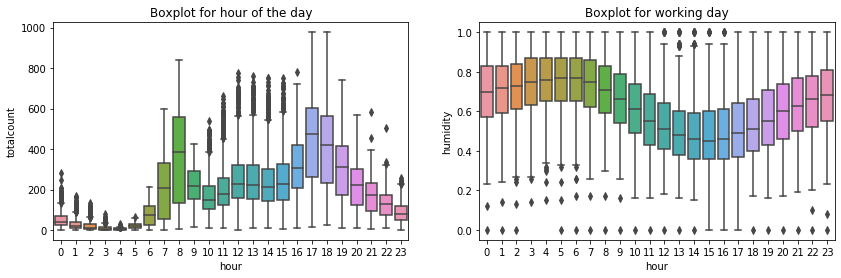

In [162]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['totalcount'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=hourly_data['hour'],y=hourly_data['humidity'], ax=ax2)

## Building a predictive model according to the analysis of the data 

In [599]:
hourly_data.describe()

,temp,atemp,humidity,windspeed,totalcount
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000
50%,0.500000,0.484800,0.630000,0.194000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000


In [465]:
hourly_data.describe()

,temp,humidity,totalcount
count,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,189.463088
std,0.192556,0.192930,181.387599
min,0.020000,0.000000,1.000000
25%,0.340000,0.480000,40.000000
50%,0.500000,0.630000,142.000000
75%,0.660000,0.780000,281.000000
max,1.000000,1.000000,977.000000


## Data Transformation Looking at the types describe in feature selection below

In [526]:
'''''
from pandas.api.types import is_numeric_dtype
outliers = ['humidity']
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(outliers):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
data = remove_outlier(hourly_data).head()

'''''

"''\nfrom pandas.api.types import is_numeric_dtype\noutliers = ['humidity']\ndef remove_outlier(df):\n    low = .05\n    high = .95\n    quant_df = df.quantile([low, high])\n    for name in list(outliers):\n        if is_numeric_dtype(df[name]):\n            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]\n    return df\ndata = remove_outlier(hourly_data).head()\n\n"

5

In [600]:
'''''
:::Here we encode our categorical data for modelling purposes to have weight not in terms on number values
   but by what they mean
'''''
#hourly_data = hourly_data.fillna(hourly_data.median(axis=0), inplace=False)
Transformed = pd.get_dummies(hourly_data, prefix_sep='_')

Transformed.head(10)


,temp,atemp,humidity,windspeed,totalcount,season_1,season_2,season_3,season_4,month_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0000,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0000,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0000,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0000,13,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5,0.24,0.2576,0.75,0.0896,1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
6,0.22,0.2727,0.80,0.0000,2,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
7,0.20,0.2576,0.86,0.0000,3,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
8,0.24,0.2879,0.75,0.0000,8,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
9,0.32,0.3485,0.76,0.0000,14,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


In [609]:


Y = Transformed["totalcount"]
X = Transformed.drop(["totalcount"], axis = 1)




In [601]:
'''''
cols = list(X.columns.values)
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X = quantile_transformer.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
'''''

Since in the first part we saw that the distribution of our data points of interest did not have the normal distribution, here we normalise the data features to conform to the same distribution that is close to the normal distribution with mean of 0 and standard deviation of 1 hence, distribution ~ Normal(0, 1). This distribution is for our features of interest which will have an impact on the dependent variables hereby totalcount.

In [612]:

cols = list(X.columns.values)
imp = Imputer(missing_values=0, strategy='mean', axis=1)
imp.fit(X)
X = imp.transform(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = cols


In [606]:
print(len(Y))
print(len(X))

17379
17379


In [615]:
# Here we write a few functions that will be useful to perform the crossvalidation

def get_indices(y, test_frac = 0.2):
    '''
       Getting the indices for test indices
       train data and according to values position of target 
    '''
    values_indices = np.arange(len(y))
    test_indices = np.random.choice(values_indices, size = int(test_frac*len(values_indices)), replace=False)
    train_indices = list(set(values_indices).difference(set(test_indices)))
    return train_indices,test_indices

def pred_model(mod, X_train, X_test, y_train, y_test):
    '''
    :We train the model
    '''
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    return r2_score(y_true=y_test, y_pred=y_pred)


def data_ratio(X, y, feature, value):
    '''
    :param X: df
    :param y: vector
     split the data for train and test sets according indices
    '''
    X = X.reset_index()
    ind_neg = X[X[feature].isin(value)].index.values
    ind = X[~X[feature].isin(value)].index.values
    
    X_train = X.loc[ind,]
    y_train = y[ind]
    X_test = X.loc[ind_neg,]
    y_test = y[ind_neg]
    return X_train, y_train, X_test, y_test


def crossvalidate(mod, X, y, n = 50, test_frac = 0.2, model = "", verbose=""):
    '''
      some coments
    '''
    r2 = []
    for _ in range(n):
        # Generate indices:
        train_ind, test_ind = get_indices(y, test_frac=test_frac)
        X_train = np.matrix(X)[train_ind]
        y_train = y[train_ind]
        X_test = np.matrix(X)[test_ind]
        y_test = y[test_ind]
        # Model
        r2.append(pred_model(mod, X_train, X_test, y_train, y_test))
    if verbose == True:
        print()
        print(model)
        print("r2 Mean:", np.mean(r2))
        print("r2 std:", np.std(r2))
    return np.mean(r2)
    
def best_fitted_model(models, types_, X, y, n=50, verbose=True, mode_cv="random"):

    scores = []
    for i in range(len(models)):
        model = models[i]
        type_ = types_[i]
        if mode_cv == "random":
            kfold = model_selection.KFold(n_splits=50, random_state=0)
            predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
            scores.append(predicted.mean())
     
    print(scores)
    best_fit = scores.index(max(scores))
    if verbose == True:
        print()
        print("--------------------------")
        print("# The best model is", types_[best_fit])
        print("--------------------------")
    return scores, types_[best_fit]
    
def sort_coefs(mod, X):

    cols = list(X.columns)
    coefs = list(mod.coef_)
    df = pd.DataFrame([cols, coefs]).transpose()
    df.columns = ["Variable", "Coef"]
    df = df.set_index("Variable")
    df["sort"] = np.abs(df["Coef"])
    df = df.sort_values("sort", ascending=False).drop("sort", axis=1)
    
    return df

In [616]:
#--------------------------------------------------#

indices_train, indices_test = get_indices(Y)

X_test = X.iloc[indices_test]

X_train = X.iloc[indices_train]
y_test = Y[indices_test] # this is the validation
y_train = Y[indices_train]

models = [RidgeCV(),
          linear_model.BayesianRidge(),
          LassoCV(),
          linear_model.LinearRegression(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()
          ]

type_ = ["RidgeCV",
         "Bayesian Ridge",
         "LassoCV",
         "Linear Regression",
         "HuberRegressor",
         "ElasticNetCV",
         "DecisionTreeRegressor",
         "ExtraTreesRegressor",
         "GradientBoostingRegressor",
         "RandomForestRegressor",
         "BaggingRegressor"
         ]


performance, best_fit  = best_fitted_model(models, type_, np.matrix(X_train), y_train, mode_cv="random")




[0.06448065436288825, 0.0677636681667135, 0.18348380538648634, 0.06299720356099797, 0.07199579651755852, 0.20947509635565376, 0.23431549489261447, 0.5622055728800397, 0.5631055395832658, 0.5431134514647225, 0.547865313549723]

--------------------------
# The best model is GradientBoostingRegressor
--------------------------


In [401]:
models[type_.index(best_fit)]

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [494]:

model = models[type_.index(best_fit)]
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


[348.9  93.8 131.8 180.7 351.2 108.1 105.5 222.3 114.5 150.8]
[166 110 110 185 427  92  97 140  42 142]


In code below we check the performance of our best model as pertains $R^2$ score. $R^2$ score is a statistical measure that explains how closely the model fits the data. It therefore, explains the percentage of the response variable variation that is explained by the model. It is hence given by;
 
$R^2$ = ${Explained \  Variation} \over {Total \ Variation} $

This shows that we expect $R^2$ to be in the range  $[ \ 0 \ ,\ 1\ ]$, the score of $0$ means that the model explains nothing about variation of the response data around its mean and that of 1, means the model explains all that is to explain in terms of variations response data around its mean. We expect, on average a good model to explain have atleast $R^2$ of $70\%$. In our case, the models we used for this data all have a high score $R^2$ and hence, we can say all the models we used are able to explain the variations of the response data (total count ) around its mean. 

Here let us try to plot the predicted values by our best model against the ground truth data for only a few data points. The reason for only considering a few data points is so that we are able to visualise the results since for a lot of data points we will be unable to see anything tangible. And indeed as can be seen in the plots below the predicted values are almost as exact as the actual ground truth data.

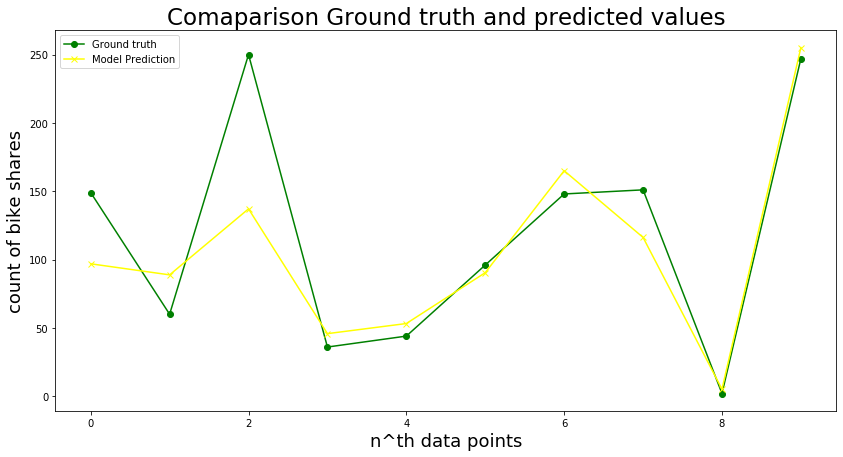

In [225]:

#plots of ground truth against the predictions
plt.figure(figsize=(14,7))
plt.plot(np.array(y_test)[0:10], "o-", color='green')
plt.plot(y_pred[0:10], "x-", color = "yellow")
plt.legend(["Ground truth", "Model Prediction"])
plt.xlabel('n^th data points', fontsize=18)
plt.ylabel('count of bike shares', fontsize=18)
plt.title('Comaparison Ground truth and predicted values', fontsize = 23)
plt.show()

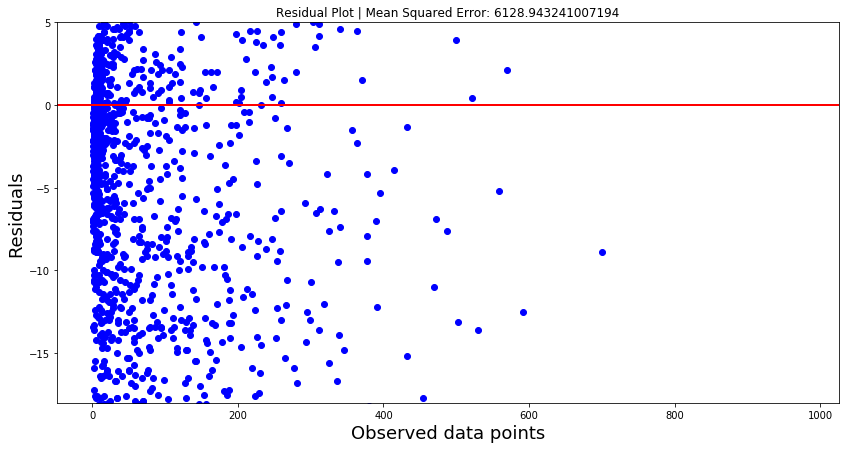

In [226]:
''''
Now we have seen that the prediction for chosen model are almost if not the same as the actual data points.
Let us check the mean deviations from the actual data points when we are predicting the values. We hope to 
visualise the behavoir of the linear model in terms of the line for residues - we are the squared errors in
this case, the predicted values from the actual data. We consider only the test data in this case.
'''''

# code below for the above description and results in plots below


residuals = y_test-y_pred
plt.figure(figsize=(14,7))
plt.scatter(y_test, residuals, color = "blue")
plt.axhline(lw=2,color='red')
plt.ylim(-18, 5)
plt.xlabel('Observed data points', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.title('Residual Plot | Mean Squared Error: ' + str(mean_squared_error(y_test, y_pred)))
plt.show()

From the plot above, the observed data points are ploted against the residuals for which are the difference between the observed data points and the predicted data points from our best model. We have also calculated the mean absolute error between the predicted values and the observed values. The mean absolute error of 0.38417 shows that in all the predictions by the model, the predicted values deviate on average by 0.38417 from the observed values. This is good prediction in this case looking at the data presented and a sample plot shown also between the predicted values and the observed values where we have seen that the predicted are almost if not the same as the observed values. 

In [228]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.5143201589223553

Text(0, 0.5, 'Explained variance')

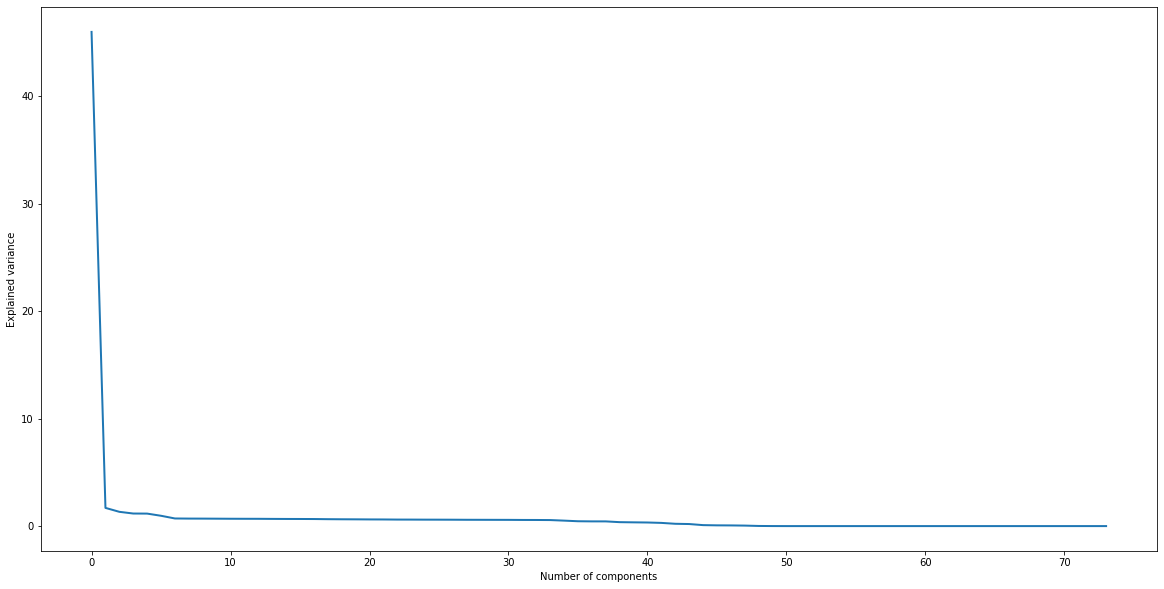

In [229]:

from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [230]:
from sklearn.pipeline import Pipeline

etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])

from sklearn.model_selection import GridSearchCV

print(pipeline.get_params())

{'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('etr', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False))], 'verbose': False, 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                 

In [231]:

hyperparameters = {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=10)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

{'etr__max_depth': 20, 'etr__n_estimators': 500, 'pca__n_components': 39}


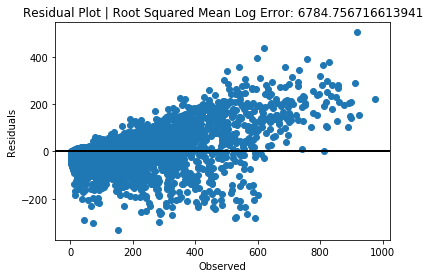

In [233]:

y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(mean_squared_error(y_test, y_pred)))
plt.show()

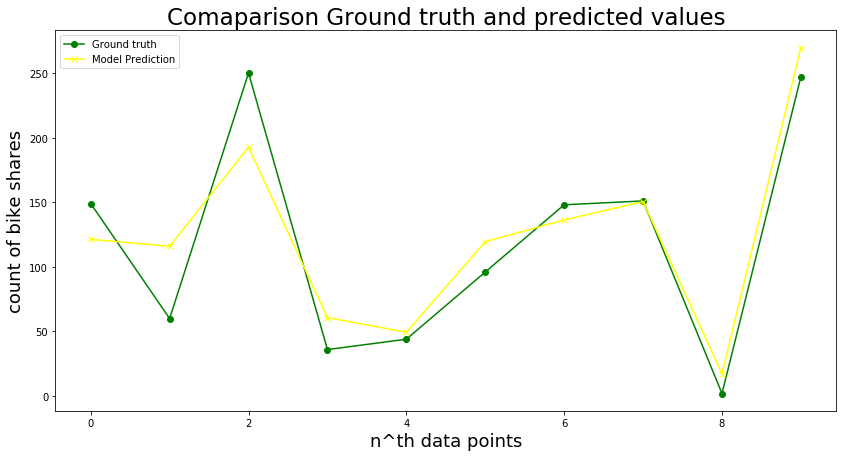

In [237]:
plt.figure(figsize=(14,7))
plt.plot(np.array(y_test)[0:10], "o-", color='green')
plt.plot(y_pred[0:10], "x-", color = "yellow")
plt.legend(["Ground truth", "Model Prediction"])
plt.xlabel('n^th data points', fontsize=18)
plt.ylabel('count of bike shares', fontsize=18)
plt.title('Comaparison Ground truth and predicted values', fontsize = 23)
plt.show()